In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import iqr
from scipy.stats import pearsonr
from itertools import permutations
import pandas as pd

In [2]:
path = '/Users/josec/OneDrive/Documentos/MCIB-19-P/data/'
fname= 'acondicionada_orto.npz'
a = np.load(path+fname)
lista = list(a.keys())
lista

['respiracion', 'ecg', 'emg', 'pulso', 'sr']

In [3]:
respi = a['respiracion'][100000:224640]
ecg = a['ecg'][100000:224640]
emg = a['emg'][100000:224640]
pulso = a['pulso'][100000:224640]
fs =int(a['sr'])
ts = 1/fs
label =['respiración','ecg','emg','pulso']


In [4]:
#Concatenando
sen = []
sen.append(respi)
sen.append(ecg)
sen.append(emg)
sen.append(pulso)

In [8]:
#Segmentar la señal 
mascara = np.zeros(len(emg))
mascara[0:34476] = 1
mascara[34477:52448] = 2
mascara[52449:87228] = 3
mascara[87229:124640] =4


In [9]:
#Obteniendo el Z Score
ecg_z = (ecg - np.mean(ecg))/np.std(ecg)
respi_z = (respi - np.mean(respi))/np.std(respi)
emg_z = (emg - np.mean(emg))/np.std(emg)
pulso_z = (pulso - np.mean(pulso))/np.std(pulso)


In [10]:
#Concatenando el zscore
sen_z =[]
sen_z.append(respi_z)
sen_z.append(ecg_z)
sen_z.append(emg_z)
sen_z.append(pulso_z)


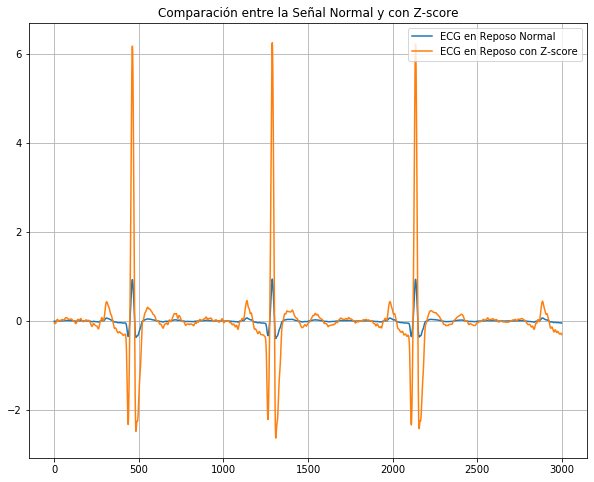

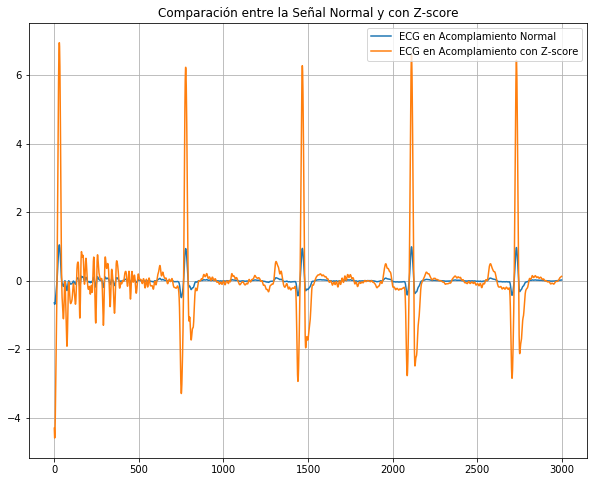

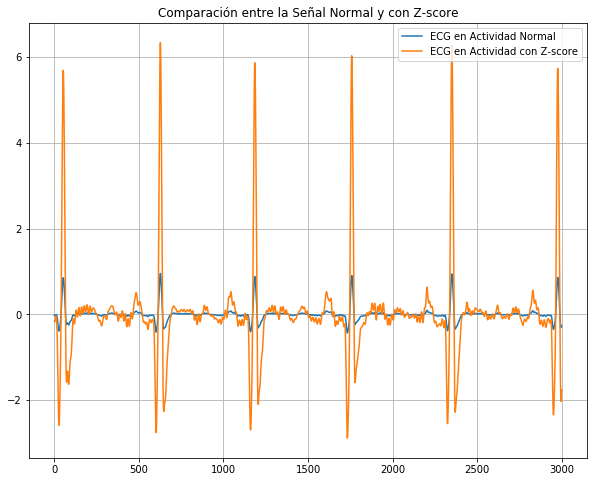

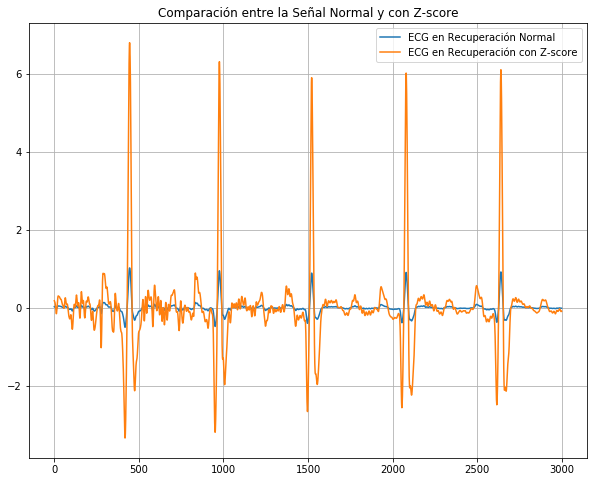

In [11]:
#Graficando Comparación Señal normal y con Z-Score
for i in range(len(sen)):
    a = ['Reposo','Acomplamiento','Actividad','Recuperación']
    plt.figure(figsize=(10,8))
    plt.plot((sen[1][mascara ==i+1])[2000:5000], label = 'ECG en %s Normal' %a[i])
    plt.plot((sen_z[1][mascara ==i+1])[2000:5000],label = 'ECG en %s con Z-score'%a[i])
    plt.legend(loc ='upper right')
    plt.title('Comparación entre la Señal Normal y con Z-score')
    plt.grid(True)
    plt.show()




In [12]:
# Obteniendo las señales reescaladas
sen_ree =[]
for i in range(len(sen)):
    sen_ree.append(sen[i]/max(abs(sen[i])))
    

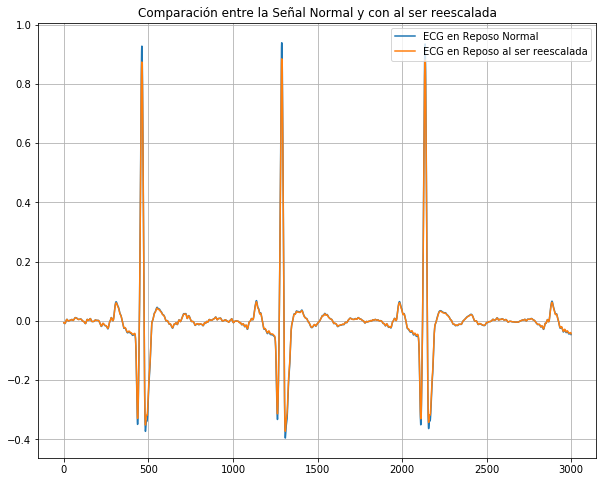

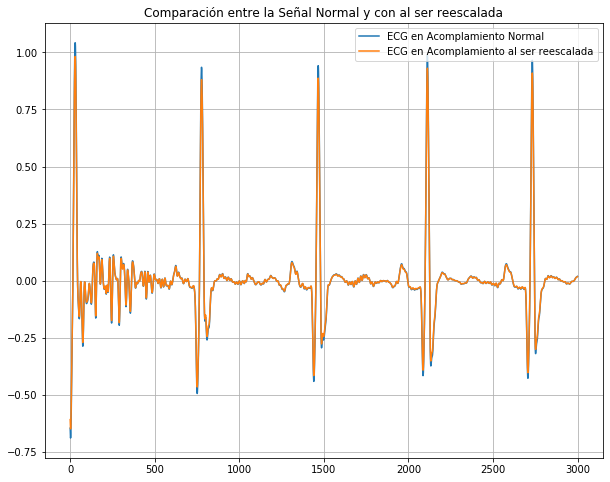

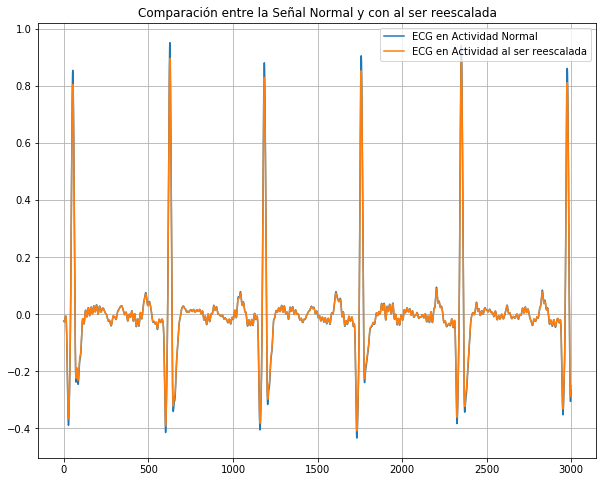

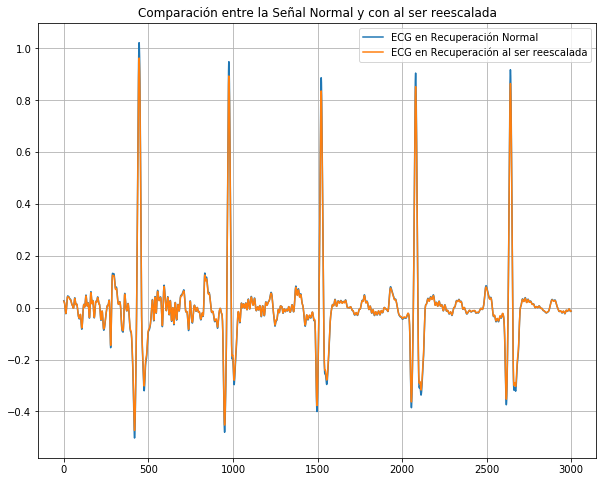

In [13]:
#Graficando Comparación Señal normal y con señal Reescalada
for i in range(len(sen)):
    a = ['Reposo','Acomplamiento','Actividad','Recuperación']
    plt.figure(figsize=(10,8))
    plt.plot((sen[1][mascara ==i+1])[2000:5000], label = 'ECG en %s Normal' %a[i])
    plt.plot((sen_ree[1][mascara ==i+1])[2000:5000],label = 'ECG en %s al ser reescalada'%a[i])
    plt.legend(loc ='upper right')
    plt.title('Comparación entre la Señal Normal y con al ser reescalada')
    plt.grid(True)
    plt.show()

In [14]:
#Definiendo Funciones
#Número de Bins
def N_bins (x):
    dist_y=max(x)-min(x)
    iqrange=iqr(x)
    nbin=math.ceil(dist_y/(2*iqrange*len(x)**(-float(1)/3)))
    return nbin

In [15]:
#Histograma dada por piña:  
def histogram (s,lab):
    nbins = np.sqrt(len(s))
    intervals= np.linspace(s.min(),s.max(),nbins+1)
    ancho_b=(s.max()-s.min())/nbins
    left = s[:,np.newaxis] > intervals[:-1][np.newaxis]
    right = s[:,np.newaxis] < intervals[1:][np.newaxis]
    hist = (left*right).sum(axis=0)
    hist= hist/sum(hist)
    plt.bar(intervals[:-1],hist,width=ancho_b,label=lab)
    legend = plt.legend(loc='upper right', shadow=True, fontsize='medium')
    legend.get_frame().set_facecolor('pink') 
    plt.grid(True)
    plt.title(label[i])
    return (intervals[:-1],hist)


In [16]:
#Histograma Alan
def density (x):
    izq,derecha=[min(x),max(x)]
    n_bin=N_bins(x)
    ancho_b=(max(x)-min(x))/n_bin              
    bins=np.arange(izq,derecha,ancho_b)
    histog=np.histogram(x, bins)
    densityf=np.float64(histog[0])
    densityf/=(sum(densityf))
    plt.bar(histog[1][0:-1],densityf,width=ancho_b*.8)
    return densityf

C:\Users\josec\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.


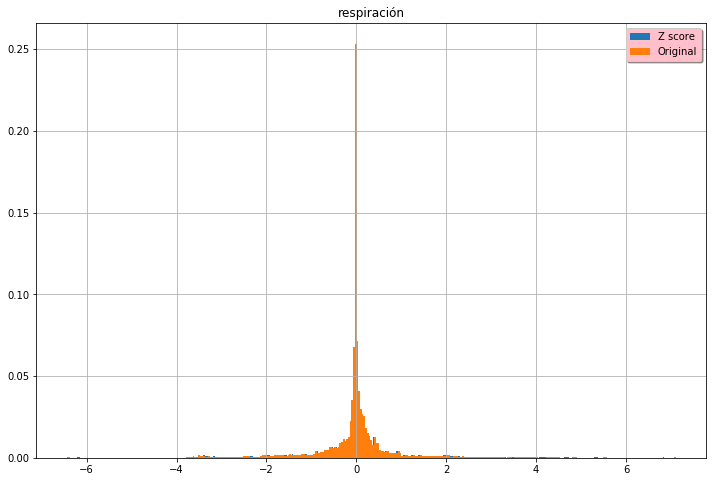

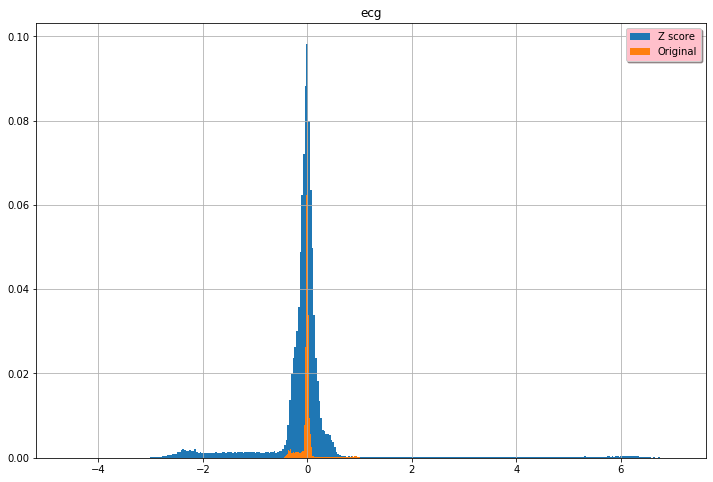

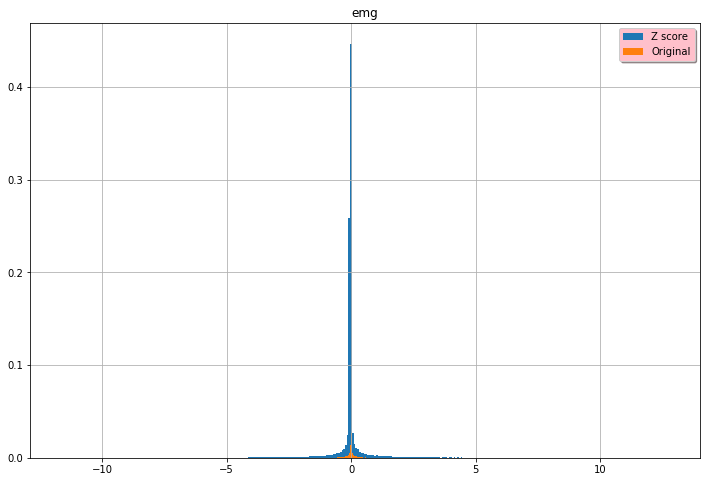

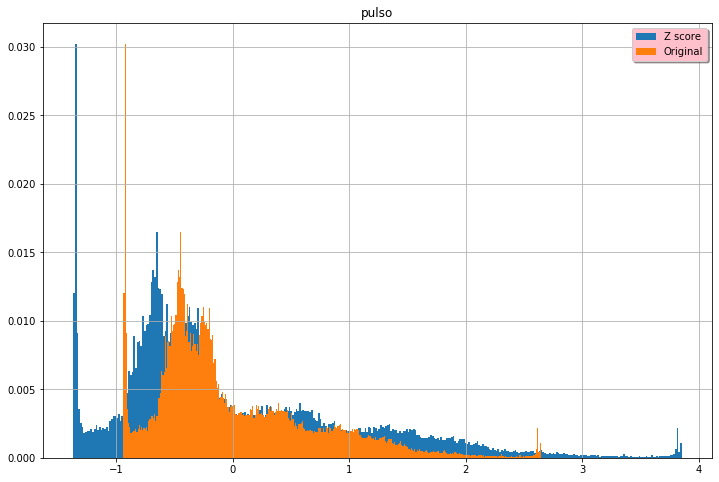

In [21]:
#Comparación Histograma original y con Z-Score
for i in range(len(sen)):
    plt.figure(figsize=(12,8))
    histogram(sen_z[i],'Z score')
    histogram(sen[i],'Original')
    
  
                      

In [108]:
#Decir cuáles señales se encuentran relacionadas
#cov = corr - MxMy

def coef_corr(x,y):
    N = len(x)
    corr = np.dot(x,y)/N
    corr = corr - (np.mean(x)*np.mean(y))
    corr = corr/(np.sqrt(np.var(x))*np.sqrt(np.var(y)))
    return corr

In [118]:
perm=list(permutations(np.arange(0,len(label)),2))
coefs = np.zeros((len(perm),4))

for i in range (len (perm)):
    coefs[i,0]= coef_corr(sen_z[perm[i][0]][mascara==1],sen_z[perm[i][1]][mascara==1])
    coefs[i,1]= coef_corr(sen_z[perm[i][0]][mascara==2],sen_z[perm[i][1]][mascara==2])
    coefs[i,2]= coef_corr(sen_z[perm[i][0]][mascara==3],sen_z[perm[i][1]][mascara==3])
    coefs[i,3]= coef_corr(sen_z[perm[i][0]][mascara==4],sen_z[perm[i][1]][mascara==4])

coefs[[3,6,7,9,10,11],:]=0
coefs=coefs[coefs[:,0]!=0]

d={'corr basal':coefs[:,0],'corr acoplamiento':coefs[:,1],'corr actividad':coefs[:,2],'corr recuperacion':coefs[:,3]}
print(pd.DataFrame(d))

   corr basal  corr acoplamiento  corr actividad  corr recuperacion
0   -0.000018           0.000390       -0.000193          -0.000100
1    0.002473           0.000010       -0.000016          -0.000570
2   -0.027069          -0.134515       -0.014913           0.020895
3    0.009422           0.063705        0.000637          -0.026291
4   -0.006025           0.004747       -0.000841          -0.004791
5   -0.000283          -0.002157       -0.001172          -0.003440


In [ ]:
# Actividad 2
